# Qs

Now that we know more about statistical testing, let's go back to our CDC data and use our knowledge to analyze the data. This time however, you are free to analyze any of the survey questions that you find interesting. Below is a list of statistical operations that you must perform for this lab. Each one must be accompanied by a graphic and at least one sentence explaining what you learned from the statistic or the test.  

You must complete the following types statistical operations:
- Create a confidence interval for a sample mean.
- Create a confidence interval for a sample proportion.
- Perform a two-sample test of means.
- Perform a two sample test of proportions.
- Perform a Chi-Square test
- Perform a one-way ANOVA

To reiterate, you will to look at 'PHYSHLTH' or the 'CHRONIC' columns that you previously worked with. You can look at any of the items within this survey.  When choosing which survey questions to analyze have a hypothesis about the question before your performing a test. Also be sure to properly clean your the responses. Finally, try to develop a consistent theme between the survey items you investigate. I.E., the survey item that you create a mean confidence interval for, should be involved in your ANOVA.  


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# %matplotlib inline

In [2]:
df = pd.read_csv('case_study.csv')

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
df['MENTHLTH'].isna().any()

False

In [5]:
df['MENTHLTH'].value_counts(dropna=False)

88.0    23119
30.0     1814
2.0      1681
5.0      1224
1.0      1084
3.0      1007
10.0      902
15.0      753
20.0      489
4.0       472
7.0       470
77.0      373
99.0      280
25.0      174
14.0      161
6.0       144
8.0        93
12.0       70
28.0       45
21.0       37
29.0       24
18.0       20
13.0       18
9.0        15
16.0       14
24.0       12
27.0       12
17.0       12
22.0        9
23.0        7
26.0        5
19.0        3
11.0        2
Name: MENTHLTH, dtype: int64

In [6]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['MENTHLTH'] = df['MENTHLTH'].replace(zero_dict)

In [7]:
zero_dict = {1: 'male',
             2: 'female',
             7: np.nan,
             9: np.nan}
    
df['SEX'] = df['SEX'].replace(zero_dict)
df.SEX.value_counts()

female    19366
male      15158
Name: SEX, dtype: int64

In [8]:
zero_dict2 = {1: 'Winter',
             2: 'Winter',
             3: 'Winter',
             4: 'Spring',
             5: 'Spring',
             6: 'Spring',
             7: 'Summer',
             8: 'Summer',
             9: 'Summer',
             10: 'Fall',
             11: 'Fall',
             12: 'Fall'}
df['IMONTH'] = df['IMONTH'].replace(zero_dict2)
seasons = df['IMONTH'].value_counts(dropna=False, normalize=True)
seasons

Fall      0.304096
Summer    0.291330
Winter    0.212505
Spring    0.192068
Name: IMONTH, dtype: float64

In [9]:
df.IMONTH.value_counts()

Fall      10505
Summer    10064
Winter     7341
Spring     6635
Name: IMONTH, dtype: int64

In [10]:
winter = np.array(seasons)[0]
spring = np.array(seasons)[1]
summer = np.array(seasons)[2]
fall = np.array(seasons)[3]

In [11]:
winter, spring, summer, fall

(0.30409610652771746,
 0.291330149080909,
 0.2125054277029961,
 0.19206831668837748)

In [12]:
df['CHRON_MENT'] = np.where(df['MENTHLTH']>=25, 1,0)

In [13]:
m_chron = df.CHRON_MENT
prop = m_chron.value_counts(normalize=True)
prop

0    0.939962
1    0.060038
Name: CHRON_MENT, dtype: float64

In [14]:
health = prop[0]
chron = prop[1]
health, chron

(0.9399623679258937, 0.060037632074106236)

In [15]:
df.dropna(subset=['MENTHLTH'], inplace=True)

In [16]:
ment = df['MENTHLTH']

In [17]:
ment.describe()

count    33892.000000
mean         3.464003
std          7.755965
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MENTHLTH, dtype: float64

In [18]:
ment.value_counts()

0.0     23119
30.0     1814
2.0      1681
5.0      1224
1.0      1084
3.0      1007
10.0      902
15.0      753
20.0      489
4.0       472
7.0       470
25.0      174
14.0      161
6.0       144
8.0        93
12.0       70
28.0       45
21.0       37
29.0       24
18.0       20
13.0       18
9.0        15
16.0       14
17.0       12
27.0       12
24.0       12
22.0        9
23.0        7
26.0        5
19.0        3
11.0        2
Name: MENTHLTH, dtype: int64

## *1. Create a confidence interval for a sample mean.*

**Confidence Interval for a sample mean:**

In [19]:
ment_mu = ment.mean()
ment_mu

3.4640033046146583

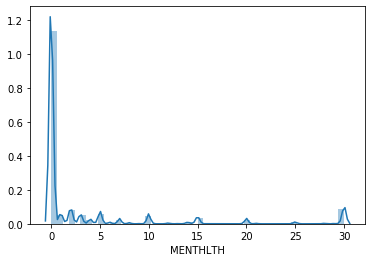

In [228]:
sns.distplot(ment)

In [21]:
norm.interval(.95) # critical values for a confidence interval 

(-1.959963984540054, 1.959963984540054)

In [22]:
ment.std()

7.755965406145017

In [23]:
len(ment)

33892

In [24]:
serr = ment.std()/(len(ment)**.5)
serr

0.04212959308651134

In [25]:
err = 1.96*serr
err

0.08257400244956223

In [26]:
low, high = round(ment_mu - err, 2), round(ment_mu + err, 2)
low, high

(3.38, 3.55)

In [27]:
print('Confidence Interval at 95%:   ', low, '-', high)

Confidence Interval at 95%:    3.38 - 3.55


 **The confidence interval at 95% for the population mean is 3.38 - 3.55.**

## *2. Create a confidence interval for a sample proportion.*

In [28]:
chron

0.060037632074106236

In [29]:
n = len(m_chron)
n

34545

In [30]:
serr = (health*chron/n)**.5
serr

0.001278128186221994

In [31]:
norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [32]:
err = 1.96*(serr)
err

0.0025051312449951083

In [33]:
low, high = chron - serr, chron + serr
low, high

(0.05875950388788424, 0.06131576026032823)

**The 95% confidence interval for the proportion of the population that is chronically mentally ill is .0599 - 0625.**

## *3. Perform a two-sample test of means.*

In [34]:
sex = df['SEX'].value_counts(normalize = False)
sex

female    18974
male      14899
Name: SEX, dtype: int64

In [35]:
female_n = np.array(sex)[0]
male_n = np.array(sex)[1]
male_n, female_n

(14899, 18974)

In [176]:
sex_means = df.groupby('SEX')['MENTHLTH'].mean()
sex_means

SEX
female    3.845104
male      2.975837
Name: MENTHLTH, dtype: float64

In [177]:
genders = df.groupby('SEX')['MENTHLTH'].count()

In [178]:
men_ment = df[df['SEX'] == 'male']['MENTHLTH']

In [179]:
fem_ment = df[df['SEX'] == 'female']['MENTHLTH']

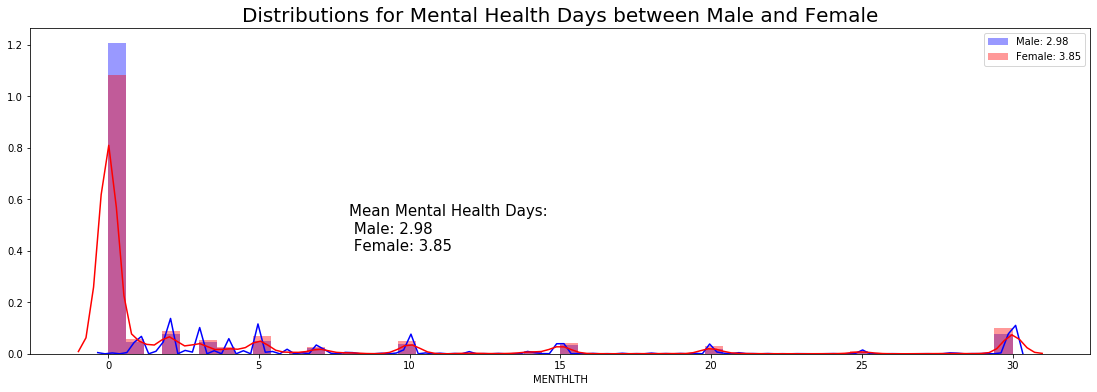

In [291]:
plt.figure(figsize=(19,6))
sns.distplot(m, color='blue')
sns.distplot(f, color='red')
plt.text(8, .4, 'Mean Mental Health Days:\n Male: 2.98\n Female: 3.85 ', fontsize=15)
plt.title('Distributions for Mental Health Days between Male and Female', fontsize=20)
plt.legend([f'Male: {male_mean:.2f}',f'Female: {female_mean:.2f}'])
plt.show()

In [264]:
m = men_ment
m_norm = np.random.choice(m, 1000)
m_list = []
for i in range(0,1000):
    m_list.append(np.random.choice(m, 1000).mean())
f = fem_ment
f_norm = np.random.choice(f, 1000)
f_list = []
for i in range(0,1000):
    f_list.append(np.random.choice(f, 1000).mean())

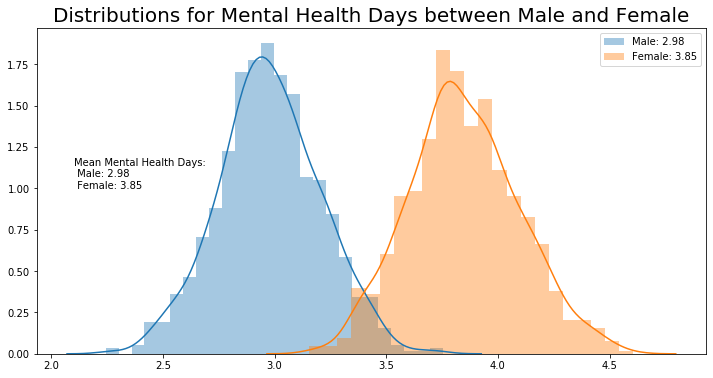

In [312]:
plt.figure(figsize=(12,6))
sns.distplot(m_list)
sns.distplot(f_list)
plt.text(2.1, 1, 'Mean Mental Health Days:\n Male: 2.98\n Female: 3.85 ', fontsize=10)
plt.title('Distributions for Mental Health Days between Male and Female', fontsize=20)
plt.legend([f'Male: {male_mean:.2f}',f'Female: {female_mean:.2f}'])
plt.show()

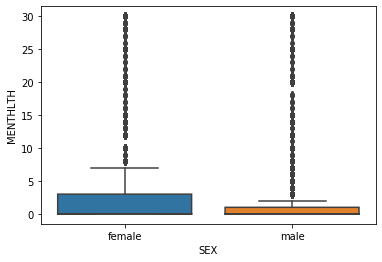

In [254]:
sns.boxplot(x=df.SEX, y=df.MENTHLTH, showfliers=True, notch=True)

In [38]:
sex_std = df.groupby('SEX').MENTHLTH.std()
sex_std

SEX
female    8.083107
male      7.284190
Name: MENTHLTH, dtype: float64

In [39]:
female_std = np.array(sex_std)[0]
male_std = np.array(sex_std)[1]
female_std, male_std

(8.083107300457545, 7.2841900153503945)

In [40]:
female_mean = np.array(sex_means)[0]
male_mean = np.array(sex_means)[1]
female_mean, male_mean

(3.8451038262886055, 2.9758373045170816)

In [41]:
serr = ( ((male_std**2)/male_n) + ((female_std**2)/female_n) )**.5
serr

0.08369442029967712

In [42]:
diff = male_mean - female_mean
diff

-0.8692665217715239

In [43]:
diff/serr

-10.38619442800391

*-10.39 is the test statistic for difference in mental health days between male and female.*

In [44]:
norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

**(-1.96 - 1.96) were the critical values, which -10.39 far exceeds. So we can reject the null hypothesis, and claim that there is a difference between these two groups (male and female) in regards to their bad mental health days per month.**

## *4. Perform a two sample test of proportions.*

In [45]:
prop_n = df.groupby('SEX')['CHRON_MENT'].count()
prop_n

SEX
female    18974
male      14899
Name: CHRON_MENT, dtype: int64

In [46]:
f_n = np.array(prop_n)[0]
m_n = np.array(prop_n)[1]
m_n, f_n

(14899, 18974)

In [47]:
m_chron = df.groupby('SEX')['CHRON_MENT'].value_counts(normalize=True)
m_chron

SEX     CHRON_MENT
female  0             0.932381
        1             0.067619
male    0             0.947111
        1             0.052889
Name: CHRON_MENT, dtype: float64

In [48]:
f_prop = np.array(m_chron)[1]
m_prop = np.array(m_chron)[3]
m_prop, f_prop

(0.05288945566816565, 0.06761884684304838)

In [49]:
diff = m_prop - f_prop
diff

-0.014729391174882728

In [50]:
serr = ( (m_prop*(1-m_prop)/m_n)  + (f_prop*(1-f_prop)/f_n)  )**.5
serr

0.002585517644147025

In [51]:
diff/serr

-5.6968828691718425

In [52]:
norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

**The critical values for this two-sample test (for proportions of mental health days between male and female) are -1.96, 1.96, and our test statistic is -5.70, which exceeds it. We can reject the null hypothesis, which states that there is no difference between male and female bad mental health day proportions.**

## *5. Perform a Chi-Square test*

In [53]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

*We will perform a Chi-Square test on chronic mental health, and seasons (4x2 contingency, 3 dof).*

In [54]:
chi2.ppf(.95, 3) # This is the critical value

7.814727903251179

In [55]:
table = [
    [9687,9264,6764,6103],
    [622, 610, 432, 410]
]

In [56]:
df.groupby('CHRON_MENT')['IMONTH'].value_counts()

CHRON_MENT  IMONTH
0           Fall      9687
            Summer    9264
            Winter    6764
            Spring    6103
1           Summer     622
            Fall       610
            Winter     432
            Spring     410
Name: IMONTH, dtype: int64

In [57]:
chi2_contingency(table)

(0.7096331039866823,
 0.8709358408294243,
 3,
 array([[9678.14711436, 9269.7666706 , 6755.64522601, 6114.44098902],
        [ 630.85288564,  604.2333294 ,  440.35477399,  398.55901098]]))

**Our critical value (for a chi-square test on proportion of mental health days and season) was 7.81. Our test statistic obtained from the chi2_contingency test was .71 with 3 degrees of freedom, which is not sufficient to reject the null hypothesis. I.e., we cannot say that there is a dependence between seasons and the proportion of bad mental health days.**

## *6. Perform a one-way ANOVA.*

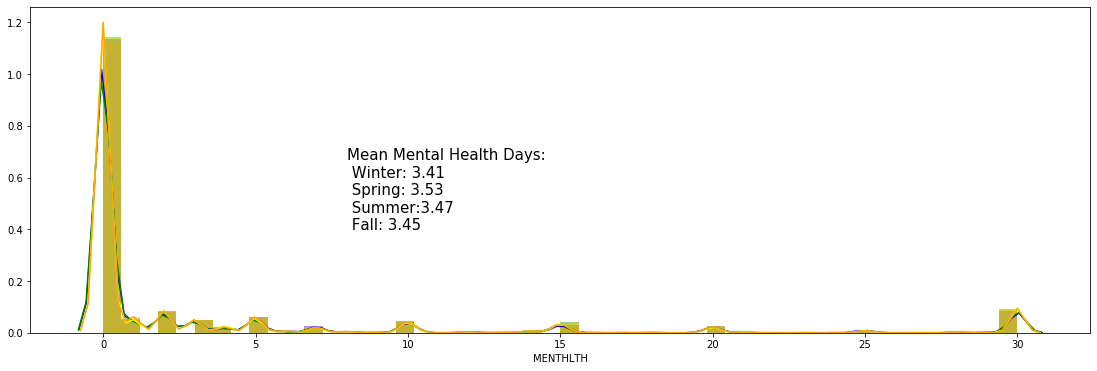

In [225]:
plt.figure(figsize=(19,6))
sns.distplot(df[df['IMONTH'] == 'Winter']['MENTHLTH'], color='blue')
sns.distplot(df[df['IMONTH'] == 'Spring']['MENTHLTH'], color='green')
sns.distplot(df[df['IMONTH'] == 'Summer']['MENTHLTH'], color='yellow')
sns.distplot(df[df['IMONTH'] == 'Fall']['MENTHLTH'], color='orange')
plt.text(8, .4, 'Mean Mental Health Days:\n Winter: 3.41\n Spring: 3.53\n Summer:3.47\n Fall: 3.45 ', fontsize=15)
plt.show()

In [58]:
df.groupby('IMONTH')['MENTHLTH'].mean()

IMONTH
Fall      3.450908
Spring    3.528942
Summer    3.471171
Winter    3.414119
Name: MENTHLTH, dtype: float64

In [59]:
df.IMONTH.value_counts()

Fall      10297
Summer     9886
Winter     7196
Spring     6513
Name: IMONTH, dtype: int64

In [60]:
df.MENTHLTH.value_counts()

0.0     23119
30.0     1814
2.0      1681
5.0      1224
1.0      1084
3.0      1007
10.0      902
15.0      753
20.0      489
4.0       472
7.0       470
25.0      174
14.0      161
6.0       144
8.0        93
12.0       70
28.0       45
21.0       37
29.0       24
18.0       20
13.0       18
9.0        15
16.0       14
17.0       12
27.0       12
24.0       12
22.0        9
23.0        7
26.0        5
19.0        3
11.0        2
Name: MENTHLTH, dtype: int64

In [61]:
stats.f_oneway(df['MENTHLTH'][df['IMONTH'] == 'Summer'],
                df['MENTHLTH'][df['IMONTH'] == 'Fall'], 
                df['MENTHLTH'][df['IMONTH'] == 'Winter'],
                df['MENTHLTH'][df['IMONTH'] == 'Spring'])

F_onewayResult(statistic=0.26400219980673134, pvalue=0.8513773980075399)

In [62]:
n = len(df['MENTHLTH'])

In [63]:
from scipy.stats import f

In [64]:
f.ppf(.95, dfn=3 , dfd=n)

2.6051712040757713

**The critical f-value for this ANOVA (across seasons by mental health days) is 2.61, and our test statistic is .264, which does not exceed this. So we accept the null hypothesis, which is that there is no difference between seasons for bad mental health days.**

# *Scratch and notes*

### Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X - \bar X_i)^2 $

- $SS_w$ = $\sum (n_i - 1) s_i ^ 2$

- $SS_t$ = $\sum (X_ij - \bar X)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$

Degrees of Freedom for ANOVA:
-  $DF_{between}$ = k - 1
- $DF_{within}$ = N - k
- $DF_{total}$ = N - 1

Notations:
- k is the number of groups
- N is the total number of observations
- n is the number of observations in each group

Like regression and t-test, we can also perform hypothesis testing with ANOVA. 

- $H_0$ : $\mu{_1}$ = $\mu_1$ = $\mu_3$ = $\mu_4$
- $H_a$ : $H_0$ is not true

Under the null hypothesis (and with certain assumptions), both quantities estimate the variance of the random error, and thus the ratio should be close to 1. If the ratio is large, then we have evidence against the null, and hence, we would reject the null hypothesis.

### Perform an ANOVA with scipy

In [65]:
# stats.f_oneway(data['cnt'][data['season_cat'] == 'summer'],
#                 data['cnt'][data['season_cat'] == 'fall'], 
#                 data['cnt'][data['season_cat'] == 'winter'],
#                 data['cnt'][data['season_cat'] == 'spring'])

### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.

### $\chi^2$ Test with scipy

In [66]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [67]:
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)

[[10, 20, 30], [6, 9, 17]]


In [68]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(stat, p, expected)

dof=2
0.27157465150403504 0.873028283380073 [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [69]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)